In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


Some relevant columns in the dataset:

1.Date - The date of the observation
2.AveragePrice - the average price of a single avocado
3.type - conventional or organic
4.year - the year
5.Region - the city or region of the observation
6.Total Volume - Total number of avocados sold
7.4046 - Total number of avocados with PLU 4046 sold
8.4225 - Total number of avocados with PLU 4225 sold
9.4770 - Total number of avocados with PLU 4770 sold
10.Total Bags -  used Total Bags 
11.Small Bags ,Large bags and XLarge Bags was used .

In [3]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
df.drop('Date',axis=1, inplace=True)

In [5]:
df.drop('type',axis=1,inplace=True)

In [6]:
df.shape

(1517, 11)

In [7]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [8]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region           object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [10]:
df['XLarge Bags']=df['XLarge Bags'].replace(0,np.NaN)
df['XLarge Bags']=df['XLarge Bags'].fillna((df['XLarge Bags'].mean()))

In [11]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,4603.263866,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,4603.263866,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,4603.263866,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,4603.263866,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,4603.263866,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,4603.263866,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,4603.263866,2016,7


In [12]:
df['year'].unique()

array([2015, 2016], dtype=int64)

In [13]:
df.drop('year',axis=1,inplace=True)

In [14]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,4603.263866,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,4603.263866,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,4603.263866,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,4603.263866,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,4603.263866,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.280000,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,4603.263866,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.000000,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,4603.263866,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   region        1517 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 112.7 KB


# Summary Statistics

In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,4603.263866,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7092.320898,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,1.500000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,711.050000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,4603.263866,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,4603.263866,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000


checking for missing values

In [17]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
dtype: int64

There are no null Value in our dataset

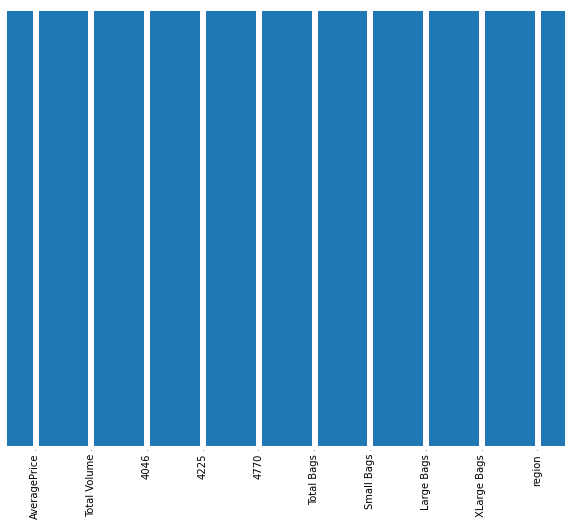

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab10',annot=True)

To check the Correlation

In [19]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.023111,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.462561,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.417757,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.447213,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.576437,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.540125,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.549738,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.392228,0.297452
XLarge Bags,-0.023111,0.462561,0.417757,0.447213,0.576437,0.540125,0.549738,0.392228,1.000000,-0.004793
region,-0.229408,0.236579,0.269481,0.215733,0.138092,0.190001,0.168650,0.297452,-0.004793,1.000000


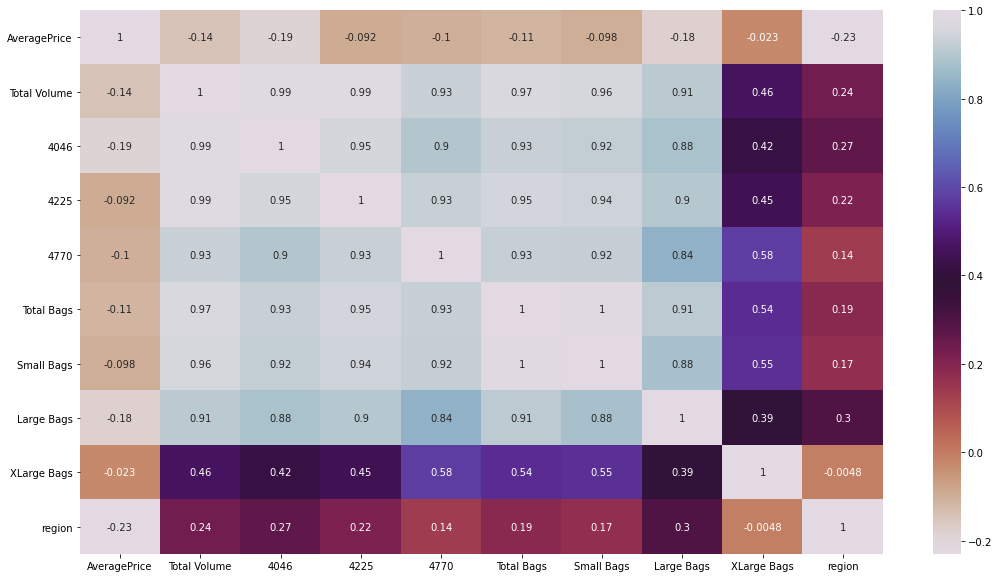

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='twilight_r')

Observation:
    4046, 4770 , Large Bags, Total Volume,Total Bags are highly negative Correlation with AveragePrice
    and Small Bags ,XLarge Bags , 4225 are negative Correlation with AveragePrice

# Data Visulization

ValueError: num must be 1 <= num <= 8, not 9

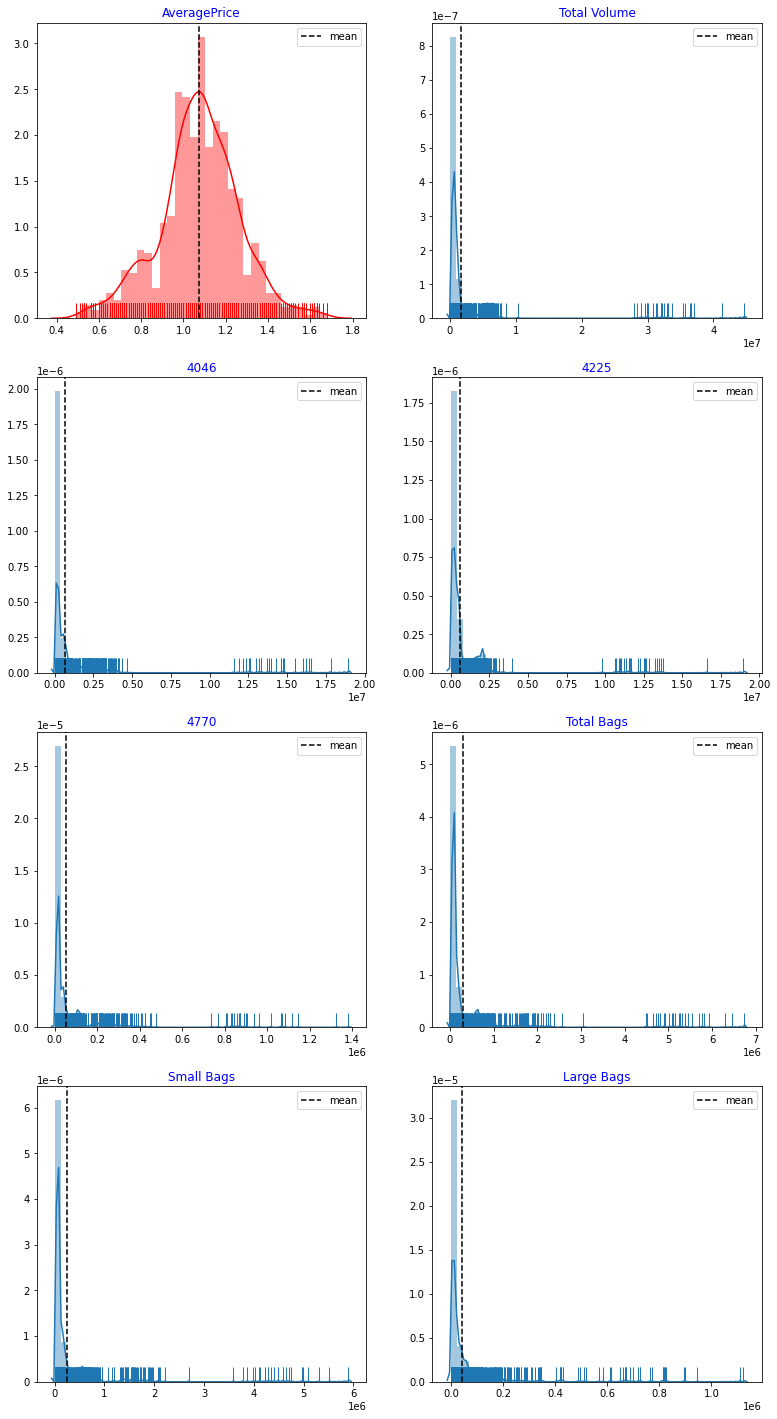

In [21]:
import itertools
cols= ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']
length =len(cols)
cs=["r"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax= sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor=("w")
    plt.axvline(df[i].mean(),linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="b")
    plt.xlabel("")
    
    import warnings
    warnings.filterwarnings('ignore')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027984E986A0>,
      dtype=object)

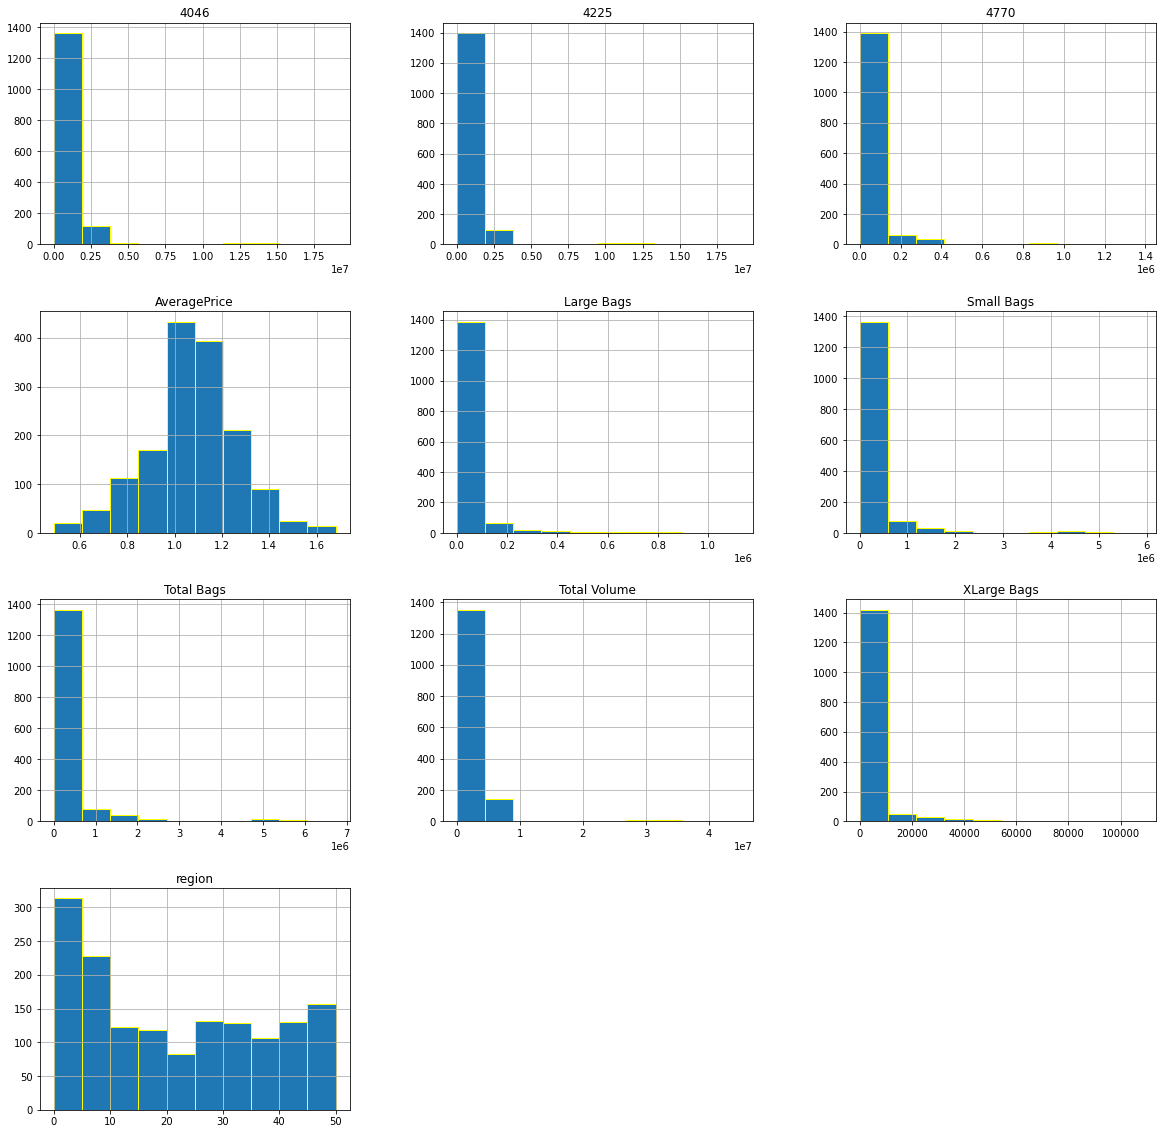

In [22]:
df.hist(edgecolor='yellow', linewidth=1.0, figsize=(20,20))

In [23]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

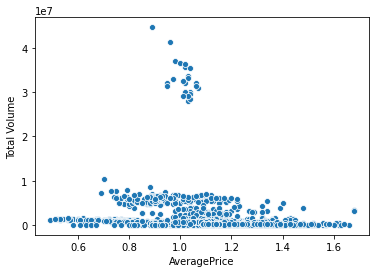

In [24]:
sns.scatterplot(x="AveragePrice" ,y="Total Volume",data=df)

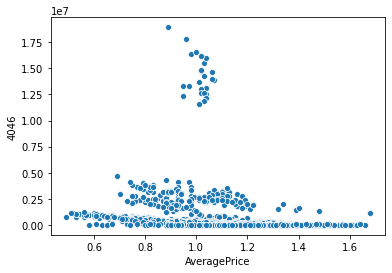

In [25]:
sns.scatterplot(x="AveragePrice" ,y="4046",data=df)

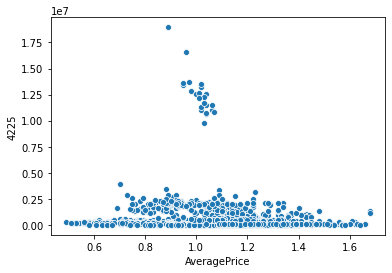

In [26]:
sns.scatterplot(x="AveragePrice" ,y="4225",data=df)

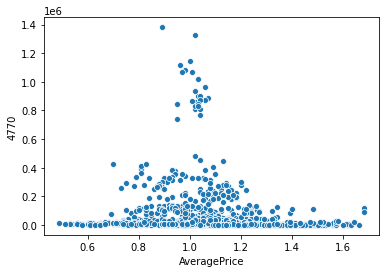

In [27]:
sns.scatterplot(x="AveragePrice" ,y="4770",data=df)

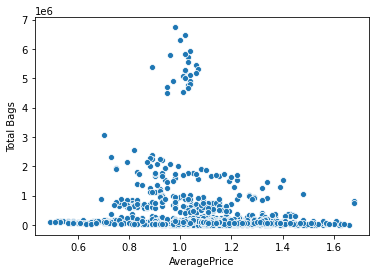

In [28]:
sns.scatterplot(x="AveragePrice" ,y="Total Bags",data=df)

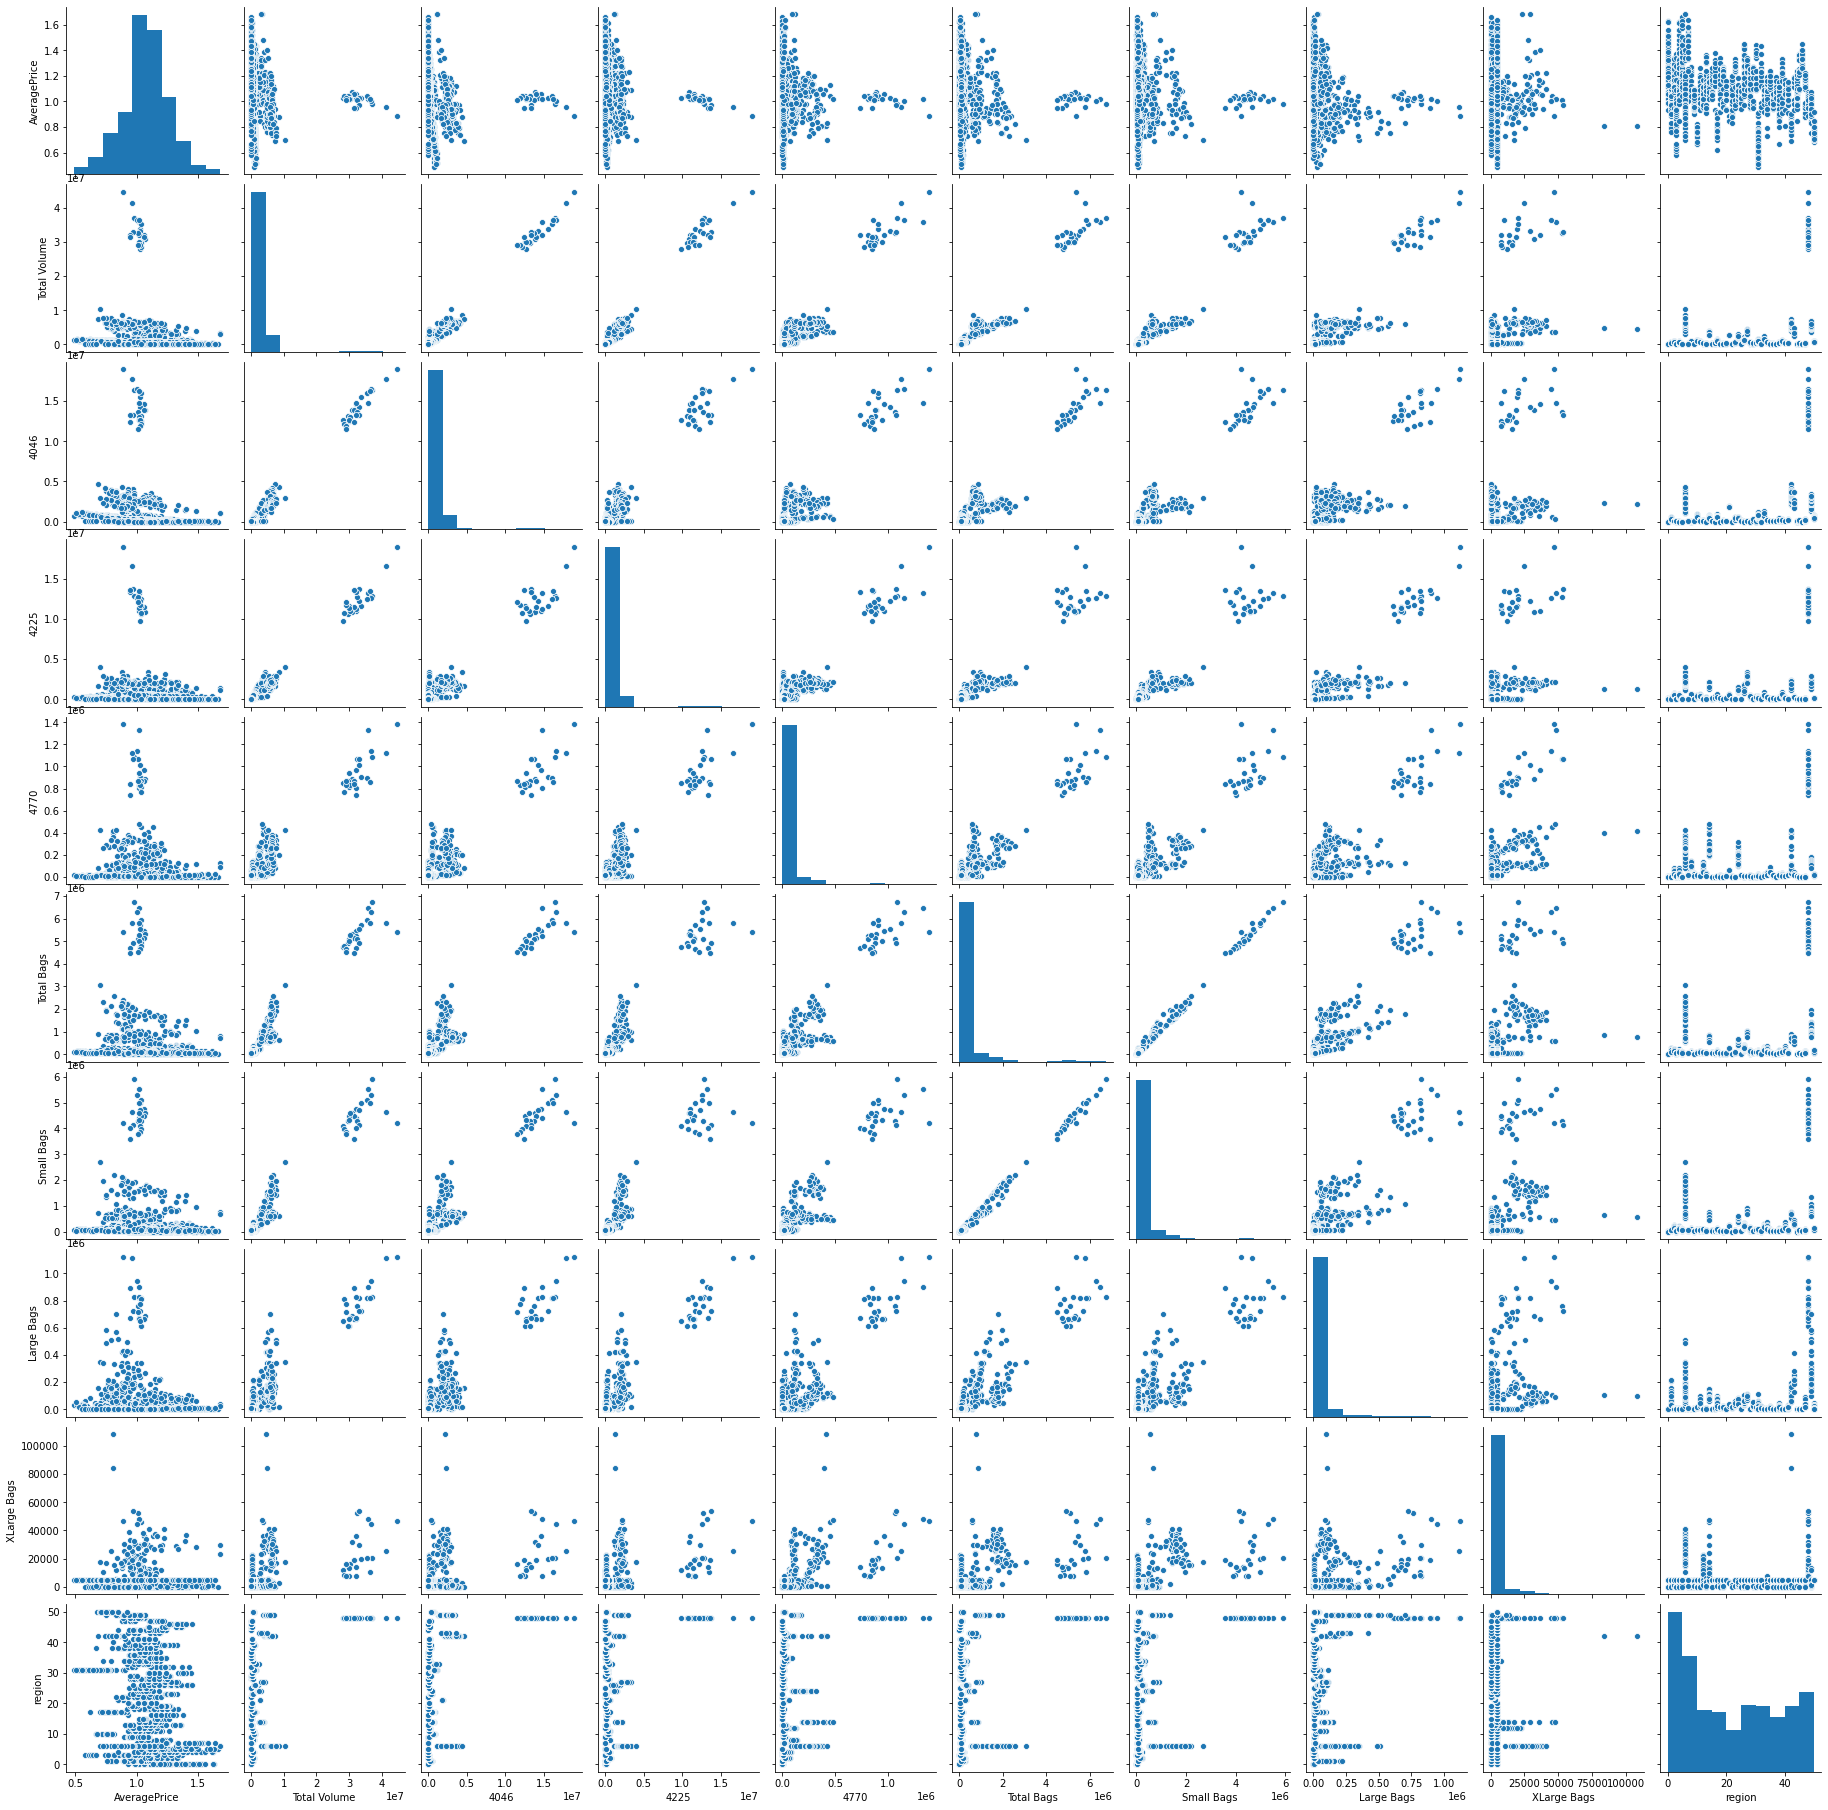

In [29]:
sns.pairplot(df)

# Ploting Outliers

In [30]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

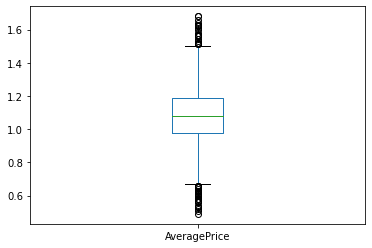

In [31]:
df['AveragePrice'].plot.box()

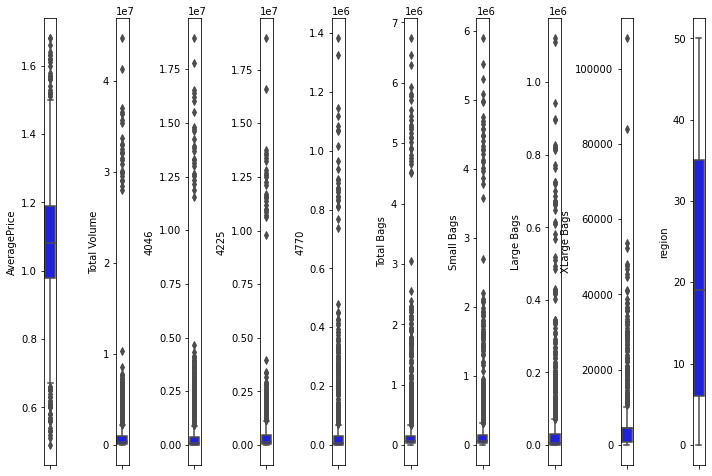

In [32]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

Observision:
    All Columns are showing high outliers except region column.

In [33]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.679852
region          0.288146
dtype: float64

Observation:   High skewness are present in figure.

# Remove Skewness and Outliers

In [34]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags    -1.281334
region          0.288146
dtype: float64

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
z

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


array([[1.35048079, 1.35676174, 1.82816171, ..., 0.96674301, 0.5262745 ,
        1.3143384 ],
       [1.45639674, 1.46638736, 2.01206913, ..., 0.95386092, 0.5262745 ,
        1.3143384 ],
       [0.76783831, 0.9321394 , 1.94183376, ..., 0.93753117, 0.5262745 ,
        1.3143384 ],
       ...,
       [2.14485045, 0.64565294, 0.20190426, ..., 0.34275114, 0.25756826,
        0.88028586],
       [2.09189247, 0.60503087, 0.13577946, ..., 0.34346272, 0.5262745 ,
        0.88028586],
       [1.88006056, 0.62805557, 0.23299293, ..., 0.44343485, 0.5262745 ,
        0.88028586]])

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,8.434738,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,8.434738,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,8.434738,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,8.434738,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,8.434738,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,8.434738,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,8.434738,7


In [39]:
df.shape

(1517, 10)

Percentage loss of Data after removing outliers

In [40]:
percentage_loss=((1517-1494)/1517)*100
print(percentage_loss)


1.5161502966381015


# Model Training

In [45]:
X=df.drop(columns=['AveragePrice'])

In [46]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,8.434738,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,8.434738,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,8.434738,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,8.434738,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,8.434738,0
...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,8.434738,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,8.434738,7


In [43]:
y=df['AveragePrice']

In [44]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=X.columns)
from sklearn.model_selection import train_test_split 



In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

lr=LinearRegression()
parameters ={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

ls=Lasso()
parameters ={'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(1,10))}
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

rd=Ridge()
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[1e-3], 'random_state':list(range(0,10))}
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

en=ElasticNet()
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'l1_ratio' :[0.5]}
clf=GridSearchCV(en,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

dt=DecisionTreeRegressor()
parameters ={'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
parameters= {'kernel':['linear','poly','rbf','sigmoid']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
parameters= {'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn=KNeighborsRegressor()
parameters= {'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
*************************************


{'alpha': 0.0001, 'random_state': 1}
*************************************


{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}
*************************************


{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'normalize': False}
*************************************


{'criterion': 'mse', 'splitter': 'best'}
*************************************


{'kernel': 'rbf'}
*************************************


{'gamma': 'auto'}
*************************************


{'algorithm': 'auto', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
*************************************




In [52]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [82]:
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=False),Lasso(alpha=0.0001,random_state=1),Ridge(alpha=1, copy_X=True, fit_intercept=True, normalize=False, random_state=0, tol=0.001),ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='mae', splitter='random'),KNeighborsRegressor(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='rbf', gamma='auto')]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')
    

Score of LinearRegression() is: 0.3864358997961539
Error
Mean Absolute Error: 0.11298653919408505
Mean Square Error: 0.02157074651663591
root mean squared Error: 0.14686982847622554
r2_score: 0.38532161039554136
*********************************************************************************************


Score of Lasso(alpha=0.0001, random_state=1) is: 0.38633754468333525
Error
Mean Absolute Error: 0.11277508689344502
Mean Square Error: 0.02153433716511591
root mean squared Error: 0.14674582503470385
r2_score: 0.38635912857051946
*********************************************************************************************


Score of Ridge(alpha=1, random_state=0) is: 0.3861754508825238
Error
Mean Absolute Error: 0.11261682855285854
Mean Square Error: 0.021518604443742383
root mean squared Error: 0.14669220989453524
r2_score: 0.38680744702952685
*********************************************************************************************


Score of ElasticNet(alpha=0.0001) is: 0.38640

#cross validate the models

In [83]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=False),Lasso(alpha=0.0001,random_state=1),Ridge(alpha=1, copy_X=True, fit_intercept=True, normalize=False, random_state=0, tol=0.001),ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='mae', splitter='random'),KNeighborsRegressor(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='rbf', gamma='auto')]

for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: LinearRegression() is:
score: [-0.06889623  0.05992731  0.38332409  0.17779362]
mean score: 0.1380371960094899
Standard Deviation: 0.16633462453890527
***************************************************************************************


Score of: Lasso(alpha=0.0001, random_state=1) is:
score: [-0.05820949  0.06373921  0.38218421  0.17872161]
mean score: 0.14160888474214736
Standard Deviation: 0.16220735801979214
***************************************************************************************


Score of: Ridge(alpha=1, random_state=0) is:
score: [-0.04605789  0.0718122   0.38180864  0.17634775]
mean score: 0.14597767411004162
Standard Deviation: 0.15725517283426665
***************************************************************************************


Score of: ElasticNet(alpha=0.0001) is:
score: [-0.06213308  0.06268534  0.38269841  0.17818381]
mean score: 0.1403586191240188
Standard Deviation: 0.16370350123031763
*************************************************

In [113]:
#using DecisionTreeRegressor model with best Results

dtc=DecisionTreeRegressor(criterion='mae', splitter='random')
dtc.fit(x_train,y_train)
print('Score:',dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,preddtc))
print('Mean Squared Error:',mean_squared_error(y_test,preddtc))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,preddtc)))
print('\n')
print("r2_score",r2_score(y_test,preddtc))


Score: 1.0


Mean absolute Error: 0.08292763157894738
Mean Squared Error: 0.01661480263157895
Root Mean Squared Error: 0.12889841981800612


r2_score 0.526545819019359


# Ensemble Technique

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=42)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score",r2_score(y_test,predrf))

score: 0.967213476188368


Mean absolute Error: 0.05851809210526316
Mean Squared Error: 0.006586856085526315
Root Mean Squared Error: 0.08115944852896867


r2_score 0.8123014385206786


In [102]:
from sklearn.ensemble import AdaBoostRegressor
dt=DecisionTreeRegressor

adb=AdaBoostRegressor(n_estimators=20,random_state=59,base_estimator=None,learning_rate=0.1)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predadb))
print('Mean Squared Error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score",r2_score(y_test,predadb))

Score: 0.5399628746864749


Mean absolute Error: 0.0991786942077274
Mean Squared Error: 0.016724111754155557
Root Mean Squared Error: 0.1293217373613406


r2_score 0.5234309543862483


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(criterion='mse', loss='lad', n_estimators=200)
gbr.fit(x_train,y_train)
print('score:',gbr.score(x_train,y_train))
predgbr=gbr.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predgbr))
print('Mean Squared Error:',mean_squared_error(y_test,predgbr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predgbr)))
print('\n')
print("r2_score",r2_score(y_test,predgbr))

score: 0.7805706544701791


Mean absolute Error: 0.07539647039805365
Mean Squared Error: 0.010915834149993005
Root Mean Squared Error: 0.1044788693946915


r2_score 0.6889432013244261


# The Best Model is DecisionTreeRegressor because of the difference between the percentage score of cross Val and r2_score is optimum

Conclusion

In [114]:
import numpy as np
a=np.array(y_test)
a

array([1.18, 1.25, 1.08, 1.07, 1.22, 0.83, 1.07, 1.1 , 0.99, 0.94, 1.14,
       1.19, 1.3 , 1.01, 1.18, 0.61, 1.28, 1.03, 1.3 , 1.17, 1.05, 1.11,
       0.93, 1.35, 1.15, 0.64, 0.99, 0.85, 1.24, 0.75, 1.19, 1.02, 1.2 ,
       1.04, 0.82, 1.31, 1.31, 1.11, 0.96, 1.18, 1.08, 1.32, 1.41, 1.  ,
       0.85, 0.94, 1.23, 1.07, 0.82, 1.11, 1.56, 0.96, 1.39, 0.97, 1.  ,
       1.1 , 1.27, 1.12, 1.04, 1.23, 1.21, 1.  , 1.4 , 1.14, 1.21, 0.87,
       0.57, 1.08, 0.74, 1.14, 1.25, 0.78, 0.98, 1.07, 0.98, 1.09, 1.16,
       1.09, 1.32, 0.78, 1.27, 0.77, 1.34, 0.56, 1.  , 0.8 , 1.03, 0.74,
       1.16, 1.12, 1.07, 1.35, 1.03, 1.11, 1.08, 1.05, 1.07, 1.43, 1.07,
       0.9 , 1.34, 1.07, 0.98, 1.  , 1.11, 0.97, 1.13, 1.27, 1.06, 1.13,
       1.03, 1.5 , 0.95, 1.26, 0.54, 1.12, 1.06, 1.2 , 1.22, 0.89, 1.03,
       0.93, 1.07, 1.12, 1.35, 0.65, 1.26, 1.03, 0.94, 0.92, 1.4 , 1.1 ,
       0.8 , 1.05, 0.79, 1.26, 1.28, 1.22, 1.13, 0.97, 1.1 , 1.17, 0.86,
       1.28, 1.14, 1.03, 0.81, 1.22, 1.08, 1.21, 1.

In [115]:
predicted=np.array(dtc.predict(x_test))
predicted

array([1.25, 1.22, 1.08, 0.94, 1.12, 0.9 , 1.01, 1.16, 1.21, 1.01, 1.08,
       0.96, 1.43, 0.97, 1.13, 0.58, 1.02, 1.05, 1.33, 1.06, 1.05, 1.17,
       0.9 , 1.13, 1.16, 0.61, 0.98, 0.84, 1.12, 0.72, 1.2 , 1.  , 1.23,
       0.98, 0.77, 1.38, 1.19, 0.98, 0.93, 1.19, 1.21, 1.24, 1.3 , 1.11,
       0.89, 1.  , 1.18, 1.02, 0.89, 1.13, 1.62, 0.97, 0.96, 1.04, 1.03,
       1.14, 1.26, 1.08, 0.98, 1.24, 1.24, 0.96, 1.13, 0.96, 1.22, 0.82,
       0.56, 1.07, 0.78, 1.52, 1.05, 0.8 , 1.05, 0.98, 0.99, 1.07, 1.13,
       1.27, 1.17, 0.9 , 1.15, 0.66, 1.3 , 0.52, 1.07, 0.79, 0.94, 0.78,
       1.11, 1.22, 1.11, 1.38, 1.05, 1.05, 0.95, 1.04, 1.26, 1.45, 0.93,
       1.14, 1.43, 0.96, 1.4 , 0.96, 0.97, 1.01, 1.02, 1.27, 1.03, 1.38,
       1.07, 1.19, 0.96, 1.33, 0.53, 1.14, 1.12, 1.29, 1.17, 0.82, 0.99,
       0.84, 1.07, 1.11, 1.37, 0.7 , 1.27, 1.11, 1.05, 1.01, 1.38, 1.18,
       0.72, 0.99, 0.73, 1.2 , 1.26, 1.12, 1.1 , 1.14, 1.07, 0.96, 0.83,
       1.07, 1.22, 1.01, 0.73, 1.2 , 1.09, 1.23, 1.

In [119]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [120]:
df_com

,original,predicted
0,1.18,1.25
1,1.25,1.22
2,1.08,1.08
3,1.07,0.94
4,1.22,1.12
...,...,...
299,1.04,0.97
300,1.18,1.17
301,1.16,1.11
302,0.98,1.03


# from the above table the model is predicted the value with 95-100 percent accuracy.

In [121]:
import pickle
filename= 'Project_3_Avacado.pkl'
pickle.dump(dtc,open(filename,'wb'))